<a href="https://colab.research.google.com/github/metasebiya/movie-dataset-II-Analysis/blob/main/movie_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing all the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# **Data Cleaning**

In [ ]:
df = pd.read_csv("sample_data/capstone.csv")

In [ ]:
df.head()

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,(9/24/2021),TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,(9/24/2021),TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   show_id     8790 non-null   object
 1   Type        8790 non-null   object
 2   title       8790 non-null   object
 3   director    8790 non-null   object
 4   Country     8790 non-null   object
 5   date added  8790 non-null   object
 6   rating      8790 non-null   object
 7   duration    8790 non-null   object
 8   listed_in   8790 non-null   object
dtypes: object(9)
memory usage: 618.2+ KB


In [ ]:
df.shape

(8790, 9)

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', "_")

In [ ]:
df

,show_id,type,title,director,country,date_added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,(9/24/2021),TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,(9/24/2021),TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,YuNUs eMRE,Not Given,Turkey,1/17/2017,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,zAK sTorm,Not Given,United States,9/13/2018,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,ziNdAGi gULZAR haI,Not Given,Pakistan,12/15/2016,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,yOKO,Not Given,Pakistan,6/23/2018,TV-Y,1 Season,Kids' TV


In [ ]:
df['date_added'] = df['date_added'].str.replace('(', '').str.replace(')','')

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%m-%d-%Y')

In [ ]:
df.dtypes

show_id               object
type                  object
title                 object
director              object
country               object
date_added    datetime64[ns]
rating                object
duration              object
listed_in             object
dtype: object

In [ ]:
df['year'] = df['date_added'].dt.year

In [ ]:
df['year_month'] = df['date_added'].dt.strftime('%Y-%m')

In [ ]:
df['no_of_days'] = (pd.Timestamp('today') - df['date_added']).dt.days

In [ ]:
df['title'] = df['title'].str.title()

In [ ]:
country_mapping = {
    'US': 'United States',
    'Us': 'United States',
    'us': 'United States',
    'UK': 'United Kingdom',
    'PK': 'Pakistan',
    'JP': 'Japan',
    'UAE': 'United Arab Emirates'
}
df['country'] = df['country'].replace(country_mapping)

## **Visualize data**

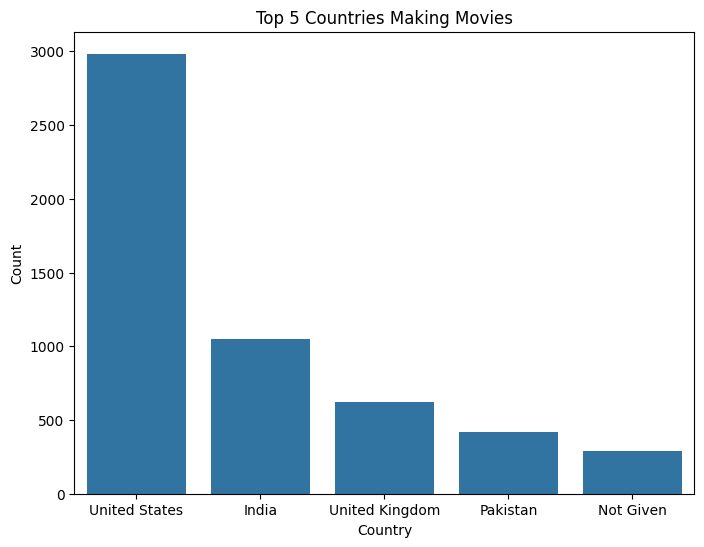

In [ ]:
# Calculate value counts of countries
country_counts = df['country'].value_counts()

# Find top 5 and least 5 countries
top5_countries = country_counts.head(5)
least5_countries = country_counts.tail(5)

# Plot the top 5 countries using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=top5_countries.index, y=top5_countries.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 5 Countries Making Movies')
plt.show()

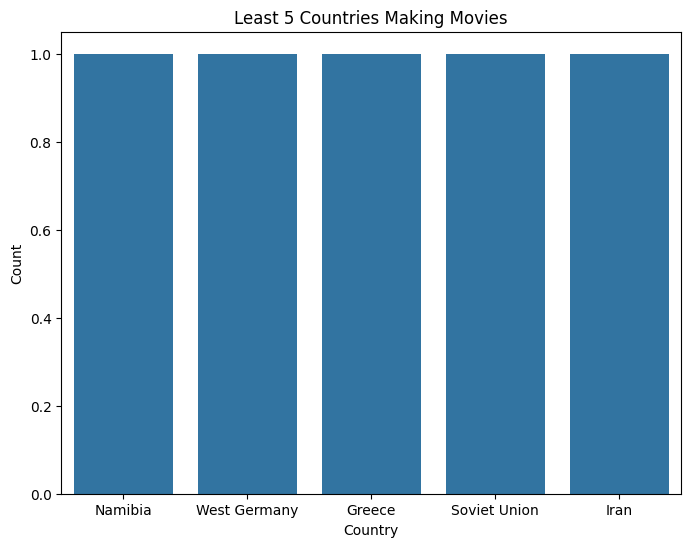

In [ ]:
# Plot the top 5 countries using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=least5_countries.index, y=least5_countries.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Least 5 Countries Making Movies')
plt.show()

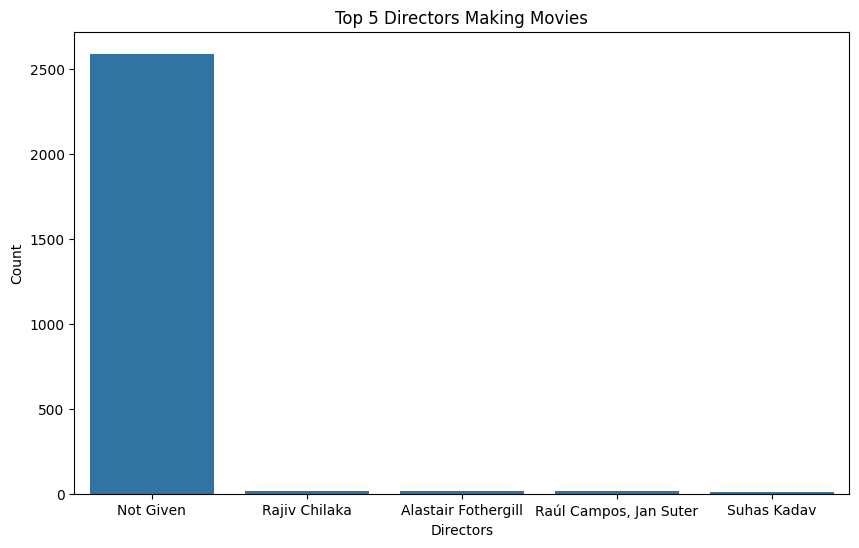

In [ ]:
# Calculate value counts of directors
director_counts = df['director'].value_counts()

top5_directors = director_counts.head(5)

# Plot the top 5 countries using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_directors.index, y=top5_directors.values)
plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Top 5 Directors Making Movies')
plt.show()

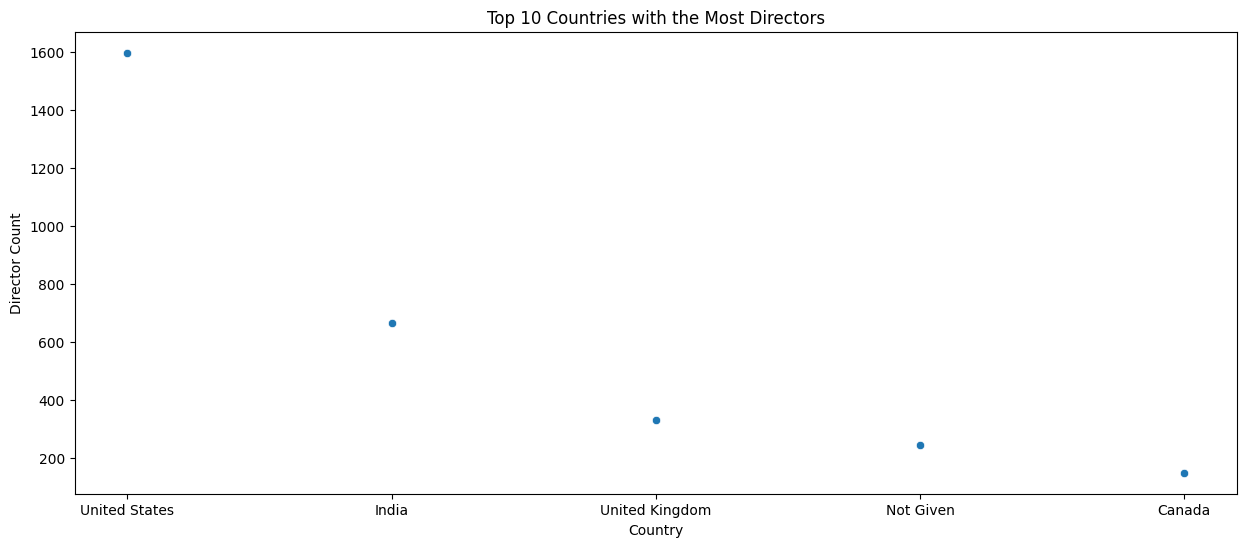

In [ ]:
# Counting the number of unique directors per country
directors_per_country = df.groupby('country')['director'].nunique().nlargest(5)

# Creating a DataFrame with the top 5 countries and their respective director counts
top_countries_directors_df = pd.DataFrame({'Country': directors_per_country.index,
                                           'Director Count': directors_per_country.values})

# Plotting the top 5 countries with the most directors
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Country', y='Director Count', data=top_countries_directors_df)
plt.xlabel('Country')
plt.ylabel('Director Count')
plt.title('Top 10 Countries with the Most Directors')
plt.show()

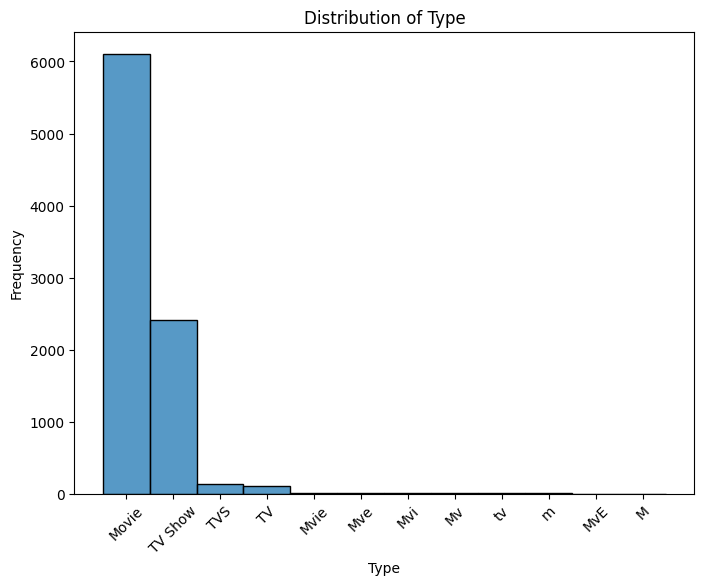

In [ ]:
type_distribution = df['type'].value_counts()
type_dist = pd.DataFrame({'type': type_distribution.index,
                          'type_count': type_distribution.values})
plt.figure(figsize=(8, 6))
sns.histplot(data=type_dist, x='type', weights='type_count', discrete=True)
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Distribution of Type')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

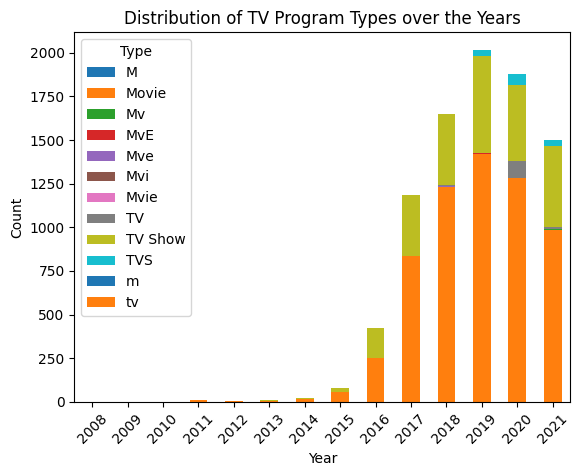

In [ ]:
# Group the data by year and program type and count the occurrences
program_counts = df.groupby(['year', 'type']).size().unstack().fillna(0)

# Create a stacked bar plot to visualize program types over the years
plt.figure(figsize=(10, 6))
program_counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of TV Program Types over the Years')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.show()

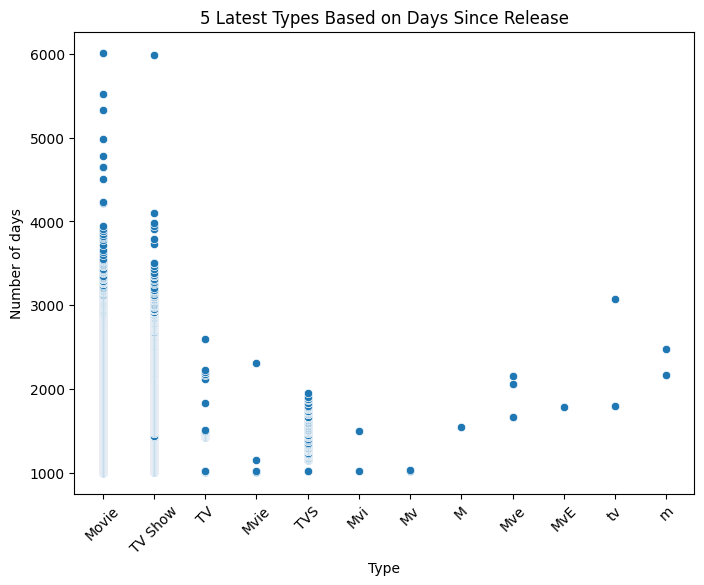

In [ ]:
sorted_df = df.sort_values(by='no_of_days', ascending=True)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='type', y='no_of_days', data=sorted_df)
plt.xlabel('Type')
plt.ylabel('Number of days')
plt.title('5 Latest Types Based on Days Since Release')
plt.xticks(rotation=45)
plt.show()

# Questions to answer

### **Which countries are the top 5 on making differnt types of TV programs?**

As per our data visualization we can see that
USA, India, UK, Pakistan and Not given are the top 5 countries making different TV program

### **Which countries are the least 5 on making differnt types of TV programs?**

As per our data visualization we can see that
Namibia, West Germany, Greece, Soviet Union and Iran are the least 5 countries making different TV program

### **Who are the top 5 directors ?**

Not given, Rajiv Chilaka, Alasthiar Fothergill, Raul Campos, Jan Suter and Suhas Khadav are the top 5 directors with serval TV programs


### **Which countries are the top 5 with many directors?**
US, India, UK, Not Given and Canada are the countries with several directors.

### **What does the distribution of type look like?**
As per the histogram, more than 6000 TV program lies on Movie. TV Show is the second most high TV program.

### **What does the distribution of type of TV program over the years?**
From the graph, we can see that from 2016 upto 2019 the distribution indicates that Movie has got a lot of coverage but started to decrease in 2021 and 2022.

## **Bonus**

Write a function that creates random ratings for each movie in 2s.f

In [ ]:
def generate_random_ratings(n):
    return [round(random.uniform(0, 5), 2) for _ in range(n)]


# Generate random ratings and store them in a new column 'Rating'
df['rating'] = generate_random_ratings(len(df))


Split the listed_in column into different columns and analyze the most popular genre. Another method that can be used is to join all the text into a list and use the counter class from collections module to get the most common genre

In [ ]:
from collections import Counter

genres = set()
for row in df['listed_in']:
    genre_list = row.split(', ')
    genres.update(genre_list)

for genre in genres:
    df[genre] = df['listed_in'].apply(lambda x: genre in x).astype(int)

genre_columns = list(genres)
genre_counts = df[genre_columns].sum().to_dict()
most_popular_genre = max(genre_counts, key=genre_counts.get)
